In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [50]:
ufo = pd.read_csv('/Users/gregorygreen/scrubbed 2.csv')

/var/folders/0q/x1bkfxj91nqfpxyr8y88v65r0000gn/T/ipykernel_19765/3035658052.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo = pd.read_csv('/Users/gregorygreen/scrubbed 2.csv')


In [51]:
ufo.columns.values

array(['datetime', 'city', 'state', 'country', 'shape',
       'duration (seconds)', 'duration (minutes)', 'comments',
       'date posted', 'latitude', 'longitude '], dtype=object)

In [52]:
ufo['longitude'] = ufo['longitude '].astype(float)

In [53]:
# Add a `sighting` column to make some other calculations easy
ufo['sighting'] = 1

In [54]:
ufo.drop(['longitude ', 'date posted'], axis=1, inplace=True)

In [55]:
ufo = ufo.reindex(columns=['datetime','city', 'state', 'country', 'shape','duration (seconds)','duration (minutes)','comments', 'longitude', 'latitude', 'sighting'])

In [56]:
ufo.columns.values

array(['datetime', 'city', 'state', 'country', 'shape',
       'duration (seconds)', 'duration (minutes)', 'comments',
       'longitude', 'latitude', 'sighting'], dtype=object)

In [57]:
ufo.head()

,datetime,city,state,country,shape,duration (seconds),duration (minutes),comments,longitude,latitude,sighting
0,10/23/08 4:45,remote,wy,NaN,flash,0.001,0.001sec,brilliant strobe light at 4am&#44 moving light...,169.875050,-46.163992,1
1,12/9/99 18:15,lyle,wa,us,fireball,0.01,millisecond,Incredible...full moon sized bright orange fir...,-121.285000,45.696111,1
2,5/15/87 23:00,island lake,il,us,light,0.01,milliseconds,4 red laser like lines,-88.191944,42.276111,1
3,6/30/02 3:15,helsinki (finland),NaN,NaN,unknown,0.01,0.01sec,Overpassing UFO,24.941025,60.173324,1
4,7/15/74 22:00,bridgeview,il,us,triangle,0.01,milliseconds,Triangular streak SW to NE horizon to horizon ...,-87.804167,41.750000,1


In [58]:
ufo.isnull().sum()

datetime                 0
city                     0
state                 5797
country               9670
shape                 1932
duration (seconds)       0
duration (minutes)       0
comments                15
longitude                0
latitude                 0
sighting                 0
dtype: int64

In [59]:
ufo.dropna(how = 'any', axis=0, subset = ['datetime', 'country', 'latitude', 'longitude', 'shape', 'city', 'comments', 'state',],inplace=True)

In [60]:
ufo.head()

,datetime,city,state,country,shape,duration (seconds),duration (minutes),comments,longitude,latitude,sighting
1,12/9/99 18:15,lyle,wa,us,fireball,0.01,millisecond,Incredible...full moon sized bright orange fir...,-121.285000,45.696111,1
2,5/15/87 23:00,island lake,il,us,light,0.01,milliseconds,4 red laser like lines,-88.191944,42.276111,1
4,7/15/74 22:00,bridgeview,il,us,triangle,0.01,milliseconds,Triangular streak SW to NE horizon to horizon ...,-87.804167,41.750000,1
5,8/29/02 23:45,toledo,or,us,triangle,0.01,millisecond,The object I saw was very clear and moved at ...,-123.937222,44.621667,1
7,11/28/01 3:41,milwaukie,or,us,fireball,0.02,0.02 sec,High speed moving fireball fallow by a bright ...,-122.638056,45.446389,1


In [61]:
ufo['datetime'] = pd.to_datetime(ufo['datetime'])

In [62]:
ufo.head()

,datetime,city,state,country,shape,duration (seconds),duration (minutes),comments,longitude,latitude,sighting
1,1999-12-09 18:15:00,lyle,wa,us,fireball,0.01,millisecond,Incredible...full moon sized bright orange fir...,-121.285000,45.696111,1
2,1987-05-15 23:00:00,island lake,il,us,light,0.01,milliseconds,4 red laser like lines,-88.191944,42.276111,1
4,1974-07-15 22:00:00,bridgeview,il,us,triangle,0.01,milliseconds,Triangular streak SW to NE horizon to horizon ...,-87.804167,41.750000,1
5,2002-08-29 23:45:00,toledo,or,us,triangle,0.01,millisecond,The object I saw was very clear and moved at ...,-123.937222,44.621667,1
7,2001-11-28 03:41:00,milwaukie,or,us,fireball,0.02,0.02 sec,High speed moving fireball fallow by a bright ...,-122.638056,45.446389,1


In [63]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66516 entries, 1 to 80329
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            66516 non-null  datetime64[ns]
 1   city                66516 non-null  object        
 2   state               66516 non-null  object        
 3   country             66516 non-null  object        
 4   shape               66516 non-null  object        
 5   duration (seconds)  66516 non-null  object        
 6   duration (minutes)  66516 non-null  object        
 7   comments            66516 non-null  object        
 8   longitude           66516 non-null  float64       
 9   latitude            66516 non-null  float64       
 10  sighting            66516 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 6.1+ MB


In [64]:
# convert column to float
ufo['latitude'] = ufo['latitude'].astype(float)
ufo['duration (seconds)'] = ufo['duration (seconds)'].astype(float)


In [65]:
# Create a new column, year, using just the year from the datetime
ufo['year'] = ufo['datetime'].dt.year

# Create new column, month, using just the month from the datetime
ufo['month'] = ufo['datetime'].dt.month

In [66]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66516 entries, 1 to 80329
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            66516 non-null  datetime64[ns]
 1   city                66516 non-null  object        
 2   state               66516 non-null  object        
 3   country             66516 non-null  object        
 4   shape               66516 non-null  object        
 5   duration (seconds)  66516 non-null  float64       
 6   duration (minutes)  66516 non-null  object        
 7   comments            66516 non-null  object        
 8   longitude           66516 non-null  float64       
 9   latitude            66516 non-null  float64       
 10  sighting            66516 non-null  int64         
 11  year                66516 non-null  int64         
 12  month               66516 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), ob

In [67]:
ufo[['duration (seconds)', 'year', 'month']].describe()

,duration (seconds),year,month
count,6.651600e+04,66516.000000,66516.000000
mean,6.572997e+03,2006.789254,6.872076
std,5.108910e+05,12.090191,3.227994
min,1.000000e-02,1972.000000,1.000000
25%,3.000000e+01,2002.000000,4.000000
50%,1.800000e+02,2007.000000,7.000000
75%,6.000000e+02,2011.000000,10.000000
max,8.280000e+07,2071.000000,12.000000


In [68]:
# How Many Unique States, Countries, and Shape Are Included In The Data

print('Number of States:', len(ufo['state'].unique()))
print('Number of Countries:', len(ufo['country'].unique()))
print('Number of Shapes:', len(ufo['shape'].unique()))

Number of States: 67
Number of Countries: 4
Number of Shapes: 28


In [69]:
ufo.value_counts('country')

country
us    63553
ca     2942
gb       11
au       10
dtype: int64

In [70]:
# Top 10 US States Report The Most Sightings
ufo[ufo['country'] == 'us'].value_counts('state', ascending=False).nlargest(10)

state
ca    8683
fl    3754
wa    3707
tx    3398
ny    2915
il    2447
az    2362
pa    2319
oh    2251
mi    1781
dtype: int64

In [71]:
ufo[(ufo['country'] == 'us') & (ufo['year'] == 2000)].value_counts('state', ascending=False).nlargest(10)

state
ca    376
az    172
wa    167
tx    116
fl     97
ny     90
or     84
il     72
oh     69
pa     59
dtype: int64

In [72]:
# Top 5 Most Common Shapes
ufo.value_counts('shape', ascending=False).nlargest(5)

shape
light       14130
triangle     6817
circle       6405
fireball     5364
unknown      4774
dtype: int64

In [73]:
ufo[ufo['country'] != 'us'].value_counts('shape', ascending=False).nlargest(5)

shape
light       659
circle      288
triangle    269
other       239
fireball    216
dtype: int64

In [74]:
# Creating Dataframe For The Top 5 Shapes

top_5_shapes = ['light', 'circle', 'triangle', 'other', 'sphere']

top_5_ufo = ufo[ufo['shape'].isin(top_5_shapes)]

top_5_ufo.head()

,datetime,city,state,country,shape,duration (seconds),duration (minutes),comments,longitude,latitude,sighting,year,month
2,1987-05-15 23:00:00,island lake,il,us,light,0.01,milliseconds,4 red laser like lines,-88.191944,42.276111,1,1987,5
4,1974-07-15 22:00:00,bridgeview,il,us,triangle,0.01,milliseconds,Triangular streak SW to NE horizon to horizon ...,-87.804167,41.750000,1,1974,7
5,2002-08-29 23:45:00,toledo,or,us,triangle,0.01,millisecond,The object I saw was very clear and moved at ...,-123.937222,44.621667,1,2002,8
9,2001-10-15 20:22:00,port orchard,wa,us,circle,0.05,.05 seconds,Large blue circular object observed falling at...,-122.635000,47.540556,1,2001,10
10,2012-10-09 23:30:00,woodbourne,ny,us,other,0.05,.05 seconds,A basket -shaped object&#44 intense orange at ...,-74.594444,41.759722,1,2012,10


In [75]:
# aggregations

avg_sighting = round(ufo['duration (seconds)'].mean(), 2)
median_sighting = round(ufo['duration (seconds)'].median(), 2)

# print out the times
print('The average sighting lasts for {0} seconds, or {1} minutes.'.format(avg_sighting, round(avg_sighting/60),2))
print('The median sighting duration is {0} seconds, or {1} minutes.'.format(median_sighting, round(median_sighting/60),2))

The average sighting lasts for 6573.0 seconds, or 110 minutes.
The median sighting duration is 180.0 seconds, or 3 minutes.


Text(0, 0.5, 'Sightings')

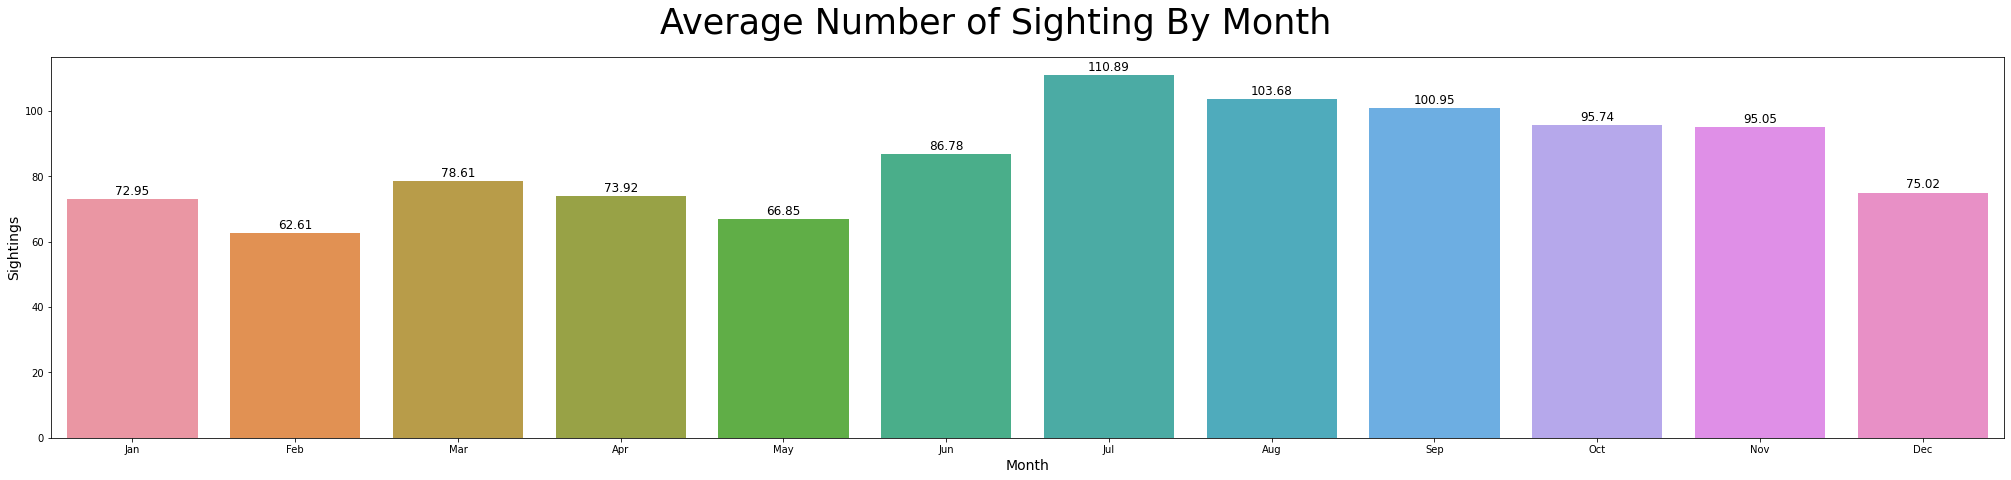

In [76]:
#set figure size 
plt.figure(figsize=(35,7))

# group data by year and month, to determine the number of sightings in each month
year_month_ufo = ufo.groupby(['year','month']).agg('sum').reset_index()

# group data by month to figure out the average number of sightings in each month 
month_ufo = year_month_ufo.groupby('month').agg('mean').reset_index()

# Replace the month number with month name
month_ufo['month'] = month_ufo['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

# Create plot
plots = sns.barplot(data = month_ufo, x = month_ufo['month'], y=month_ufo['sighting'])

# Iterrating over the bars one-by-one to annoate each bar with the number of average sightings
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    
# Modify titles and labels
plt.suptitle('Average Number of Sighting By Month', fontsize=35)
plt.xlabel("Month", size=14)
plt.ylabel("Sightings", size=14)

In [77]:
ufo.to_csv(r'/Users/gregorygreen/scrubbed4.csv')